# House Price Regression Project


In [107]:
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv")

acreage           2.599295e+00
num_rooms         7.452156e+00
square_footage    1.504235e+03
price             3.400055e+06
dtype: float64
Price vs # Rooms


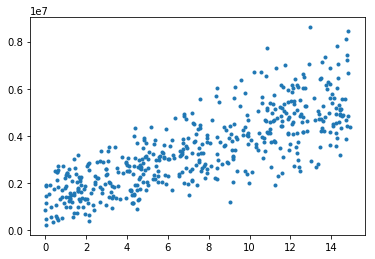

Price vs # Acres


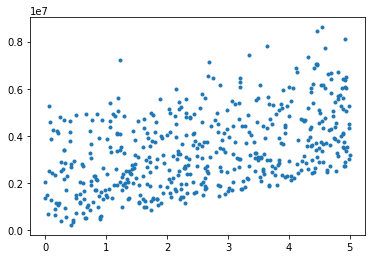

Price vs Sqft


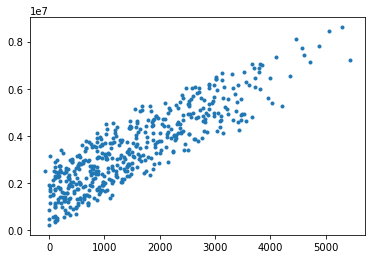

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

print(data.mean())

print("Price vs # Rooms")
plt.figure()
plt.plot(data["num_rooms"], data["price"], ".")
plt.show()

print("Price vs # Acres")
plt.figure()
plt.plot(data["acreage"], data["price"], ".")
plt.show()

print("Price vs Sqft")
plt.figure()
plt.plot(data["square_footage"], data["price"], ".")
plt.show()

In [109]:
data.columns

Index(['acreage', 'num_rooms', 'square_footage', 'price'], dtype='object')

In [110]:
univariate_price_per_acre = np.mean(data["price"] / data["acreage"])
print(f"Univariate price/acre: {univariate_price_per_acre}")

univariate_price_per_sqft = np.mean(data["price"] / data["square_footage"])
print(f"Univariate price/acre: {univariate_price_per_sqft}")

univariate_price_per_room = np.mean(data["price"] / data["num_rooms"])
print(f"Univariate price/acre: {univariate_price_per_room}")

Univariate price/acre: 5193994.327076832
Univariate price/acre: 6359.45340121864
Univariate price/acre: 1099662.2429949867


In [111]:
avg_house_price = np.mean(data["price"])

corrected_house_prices = data["price"] - avg_house_price

univariate_price_per_acre = np.mean(corrected_house_prices / data["acreage"])
print(f"Univariate price/acre: {univariate_price_per_acre}")

univariate_price_per_sqft = np.mean(corrected_house_prices / data["square_footage"])
print(f"Univariate price/acre: {univariate_price_per_sqft}")

univariate_price_per_room = np.mean(corrected_house_prices / data["num_rooms"])
print(f"Univariate price/acre: {univariate_price_per_room}")

Univariate price/acre: -3160131.158665318
Univariate price/acre: -7244.642504104564
Univariate price/acre: -1197967.5937313237


beta: 1257.2258854327117
alpha: 1508892.1041608131
mean abs error: 664772.692845919
mean abs error: 0.30174988998545443%


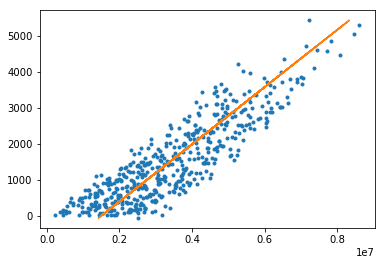

In [112]:
normalized_price = data["price"] - np.mean(data["price"])
normalized_square_footage = data["square_footage"] - np.mean(data["square_footage"])

beta = np.sum(normalized_price * normalized_square_footage) / np.sum(normalized_square_footage * normalized_square_footage)
alpha = np.mean(data["price"] - beta * data["square_footage"])
print(f"beta: {beta}")
print(f"alpha: {alpha}")

estimated_price = alpha + beta * data["square_footage"]

plt.plot(data["price"], data["square_footage"], ".", estimated_price, data["square_footage"], "-")

errors = data["price"] - estimated_price
print(f"mean abs error: {np.mean(abs(errors))}")
print(f"mean abs error: {np.mean(abs(errors) / data['price'])}%")


In [115]:
model = {
    "price_per_square_foot": 0,
    "price_per_room": 0,
    "price_per_acre": 0,
    "constant": 0
}

def estimate_prices(data, model):
    estimated_price = (
        data["square_footage"] * model["price_per_square_foot"]
        + data["num_rooms"] * model["price_per_room"]
        + data["acreage"] * model["price_per_acre"]
        + model["constant"]
    )

    return estimated_price

def calculate_gradient(data, model):
    errors = data["price"] - estimate_prices(data, model)
    
    derivatives = {
        "price_per_square_foot": -2 * np.sum(errors * data["square_footage"]),
        "price_per_acre": -2 * np.sum(errors * data["acreage"]),
        "price_per_room": -2 * np.sum(errors * data["num_rooms"]),
        "constant": -2 * np.sum(errors)
    }
    
    return derivatives

LEARNING_RATE = 0.01
def update_model(data, model):
    step_size = LEARNING_RATE / len(data)
    gradient = calculate_gradient(data, model)
    model["price_per_square_foot"] -= step_size  * gradient["price_per_square_foot"]
    model["price_per_acre"] -= step_size * gradient["price_per_acre"]
    model["price_per_room"] -= step_size * gradient["price_per_room"]
    model["constant"] -= step_size * gradient["constant"]

normalized_data = (data - data.mean()) / (data.var())

NUM_STEPS = 20000
for _ in range(NUM_STEPS):
    update_model(normalized_data, model)
print(model)

{'price_per_square_foot': 6.388612104849433e-08, 'price_per_room': 2.1032714544338217e-06, 'price_per_acre': 3.889492861237693e-07, 'constant': 1.3237517422782299e-21}


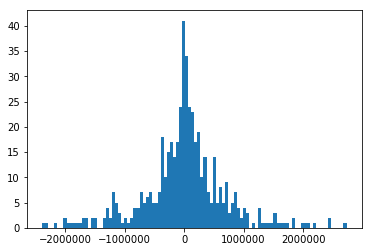

479954.48185528535
mean abs error: 0.1411030849929137%


In [116]:
estimates = estimate_prices(normalized_data, model)
estimates = (estimates * data["price"].var()) + data["price"].mean()
errors = data["price"] - estimates

plt.hist(errors, bins = 100)
plt.show()

print(np.mean(abs(errors)))
print(f"mean abs error: {np.mean(abs(errors) / data['price'])}%")

None